In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchsummary import summary

In [71]:
df = pd.read_csv("C:/Users/하태권/Downloads/BP_data.csv") #데이터 로딩
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [73]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [75]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [101]:
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(0) #결측치 Genetic_Pedigree_Coefficient 평균값으로 넣기
df = df.drop(columns=['Pregnancy'], errors='ignore')  # Pregnancy 컬럼 제거 (결측치 너무 많음)
df = df.drop(columns=['alcohol_consumption_per_day  '], errors='ignore')  # Pregnancy 컬럼 제거 (결측치 너무 많음)
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [103]:
df = df.drop(columns=['alcohol_consumption_per_day'], errors='ignore')  # Pregnancy 컬럼 제거 (결측치 너무 많음)
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [105]:
# 데이터와 타겟 분리
X = df.drop('Blood_Pressure_Abnormality', axis=1).values
y = df['Blood_Pressure_Abnormality'].values

In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 12), (400, 12), (1600,), (400,))

In [109]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [111]:
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 12]),
 torch.Size([400, 12]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

In [119]:
class DiabetesDense(nn.Module):
    def __init__(self):
        super(DiabetesDense, self).__init__()
        self.fc1 = nn.Linear(12, 64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)  
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = DiabetesDense()

In [121]:
criterion = nn.BCEWithLogitsLoss() #이진 분류일 때 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [123]:
# 손실 값과 정확도를 저장할 리스트
train_losses = []
test_accuracies = []

# 에폭 수만큼 학습 반복
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정 (Dropout, BatchNorm 등을 활성화)
    running_loss = 0.0  # 에폭 동안의 누적 손실 초기화

    # 학습 데이터셋에 대해 반복
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()         # 누적된 그래디언트 초기화
        outputs = model(inputs)       # 순전파 수행
        loss = criterion(outputs, labels)  # 손실 함수 계산
        loss.backward()              # 역전파 수행
        optimizer.step()             # 가중치 업데이트
        running_loss += loss.item()  # 손실 누적

    # 에폭별 평균 손실 저장
    train_losses.append(running_loss / len(train_dataloader))

    # 테스트 정확도 평가
    model.eval()  # 모델을 평가 모드로 설정 (Dropout 등 비활성화)
    correct = 0
    total = 0
    with torch.no_grad():  # 평가 시 그래디언트 계산 생략 (속도 향상, 메모리 절약)
        for inputs, labels in test_dataloader:
            outputs = model(inputs)  # 순전파 수행
            predicted = (torch.sigmoid(outputs) >= 0.5).float()  # 확률 → 클래스 변환 (이진 분류)
            total += labels.size(0)  # 전체 샘플 수 증가
            correct += (predicted == labels).sum().item()  # 정답 맞춘 개수 누적

    # 정확도 계산 및 저장
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    # 에폭별 학습 결과 출력
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

# 학습 완료 메시지
print("Training complete.")

Epoch 1/20, Loss: 0.6648, Accuracy: 72.25%
Epoch 2/20, Loss: 0.5657, Accuracy: 72.00%
Epoch 3/20, Loss: 0.5148, Accuracy: 74.25%
Epoch 4/20, Loss: 0.4873, Accuracy: 75.25%
Epoch 5/20, Loss: 0.4582, Accuracy: 79.75%
Epoch 6/20, Loss: 0.4305, Accuracy: 82.00%
Epoch 7/20, Loss: 0.3974, Accuracy: 80.50%
Epoch 8/20, Loss: 0.3652, Accuracy: 84.00%
Epoch 9/20, Loss: 0.3446, Accuracy: 82.75%
Epoch 10/20, Loss: 0.3284, Accuracy: 84.25%
Epoch 11/20, Loss: 0.3116, Accuracy: 84.00%
Epoch 12/20, Loss: 0.3005, Accuracy: 82.50%
Epoch 13/20, Loss: 0.2928, Accuracy: 83.00%
Epoch 14/20, Loss: 0.2804, Accuracy: 83.00%
Epoch 15/20, Loss: 0.2839, Accuracy: 82.75%
Epoch 16/20, Loss: 0.2628, Accuracy: 82.00%
Epoch 17/20, Loss: 0.2535, Accuracy: 83.25%
Epoch 18/20, Loss: 0.2466, Accuracy: 84.00%
Epoch 19/20, Loss: 0.2368, Accuracy: 83.00%
Epoch 20/20, Loss: 0.2311, Accuracy: 83.50%
Training complete.


In [127]:
model.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = (torch.sigmoid(outputs) >= 0.5).float()  # ✅ 수정됨
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# numpy 배열로 변환
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)  # ✅ 이 부분도 수정 (extend → array)

# 평가 지표 계산
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Specificity 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

# 결과 출력
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')


Confusion Matrix:
[[169  39]
 [ 27 165]]
F1 Score: 0.84
Precision: 0.84
Recall: 0.83
Specificity: 0.84


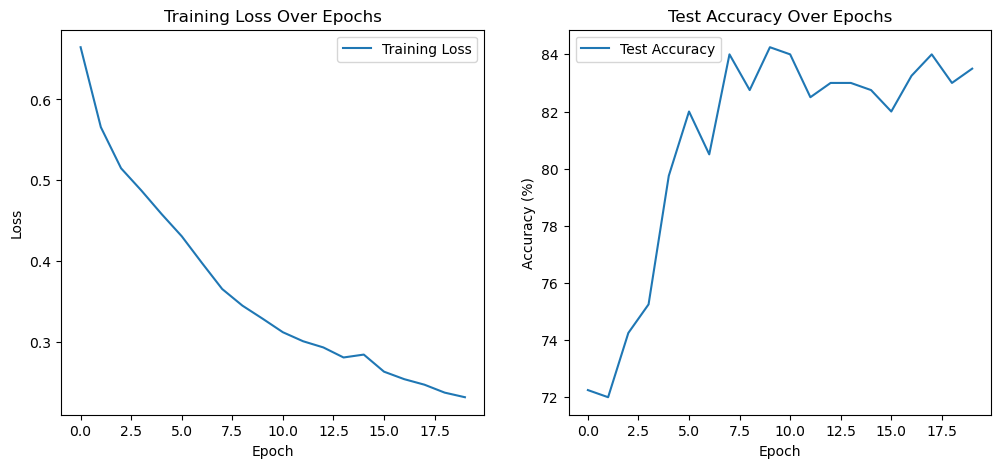

In [129]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

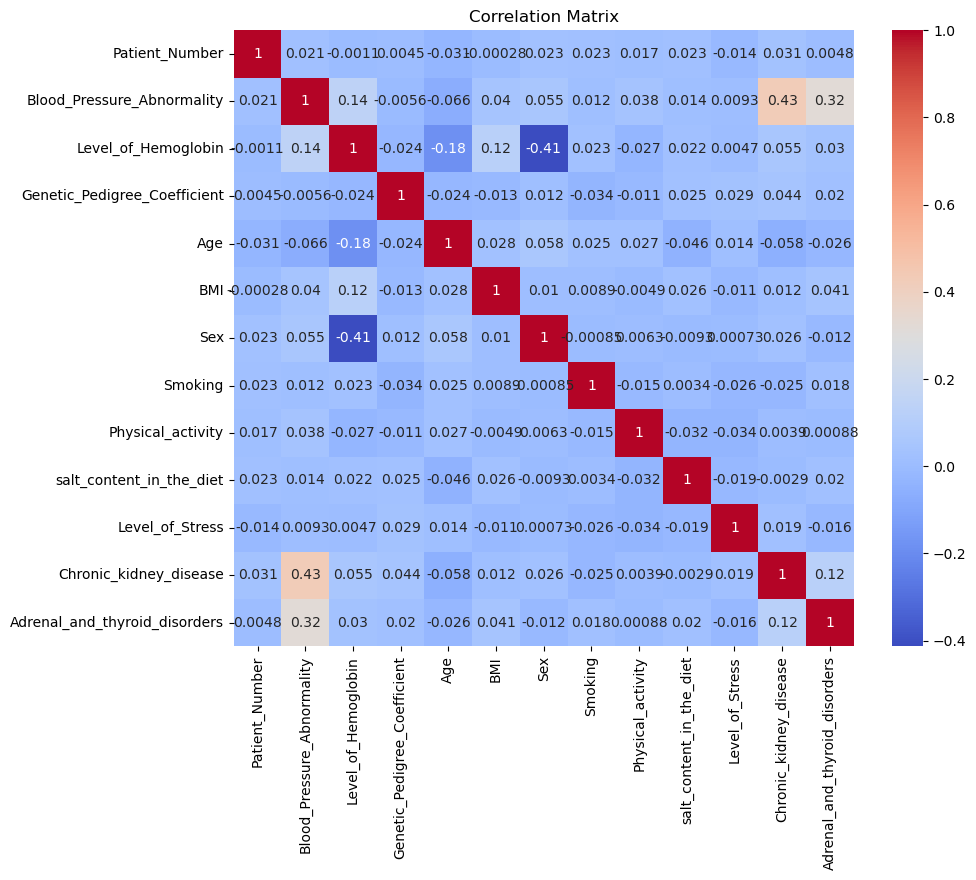

In [131]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


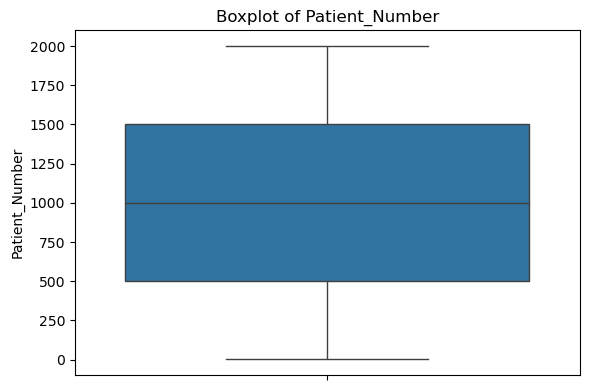

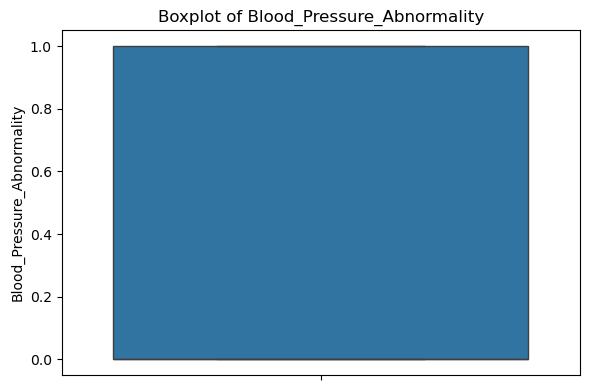

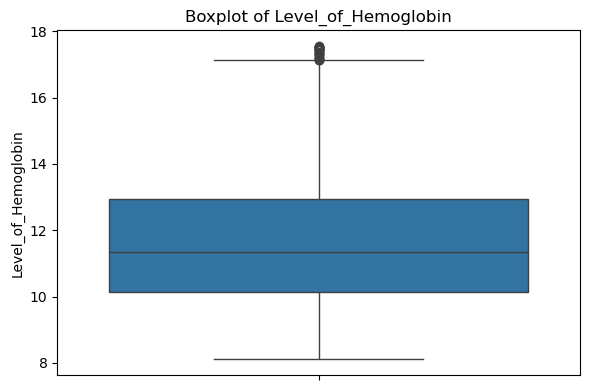

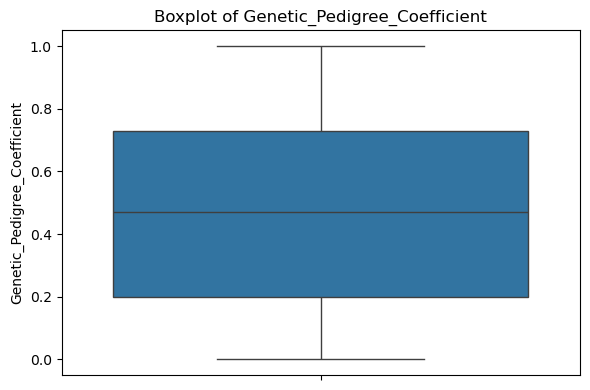

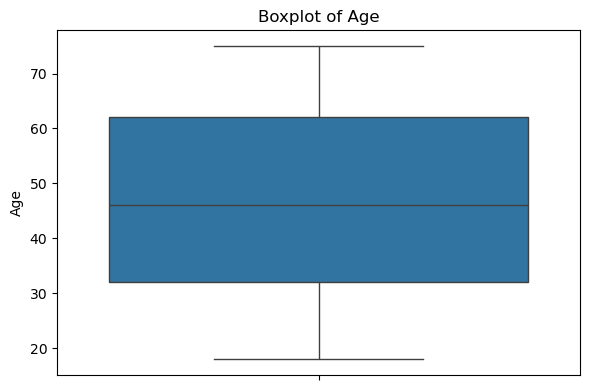

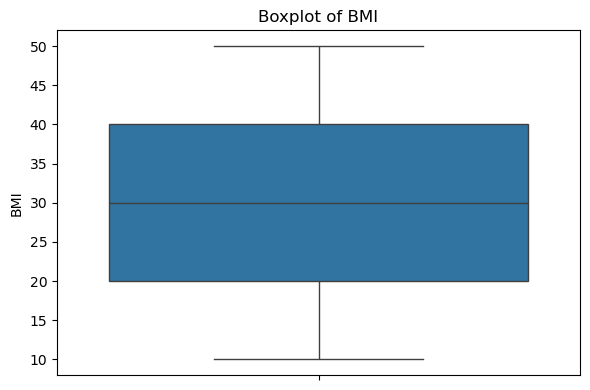

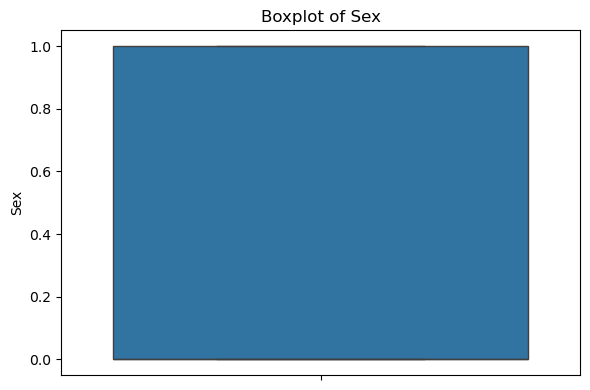

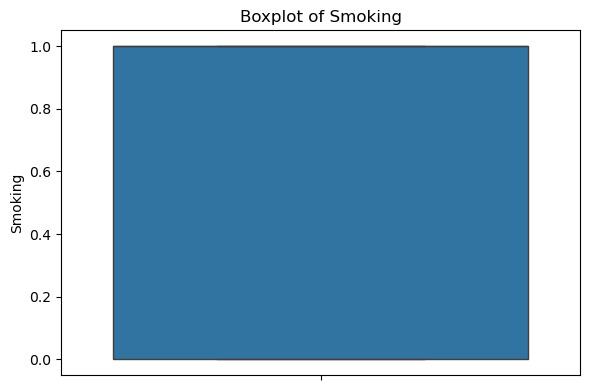

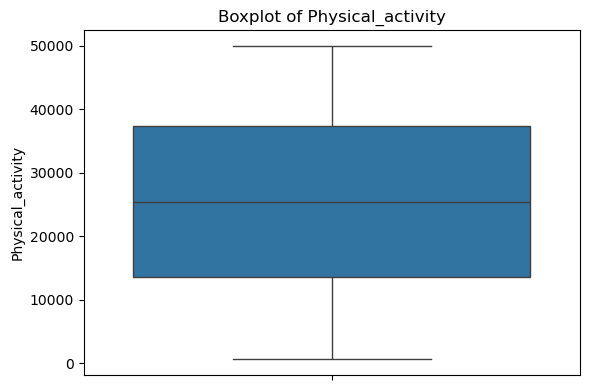

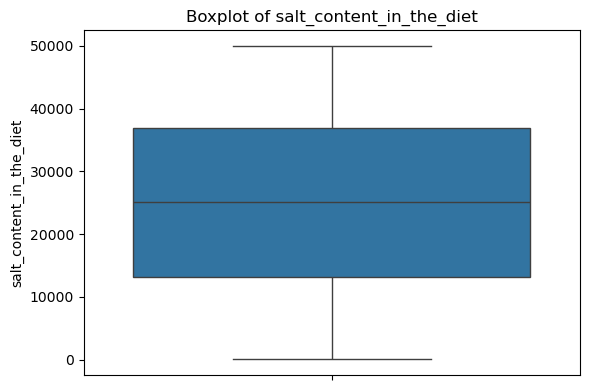

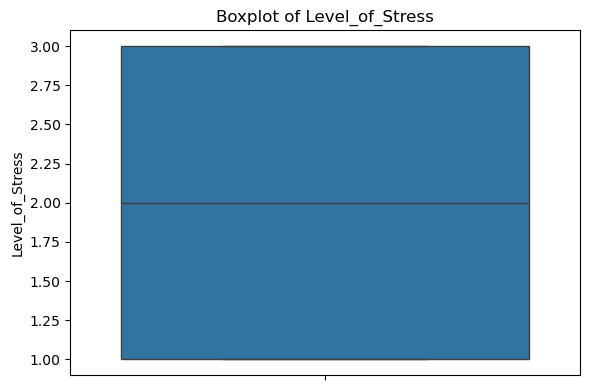

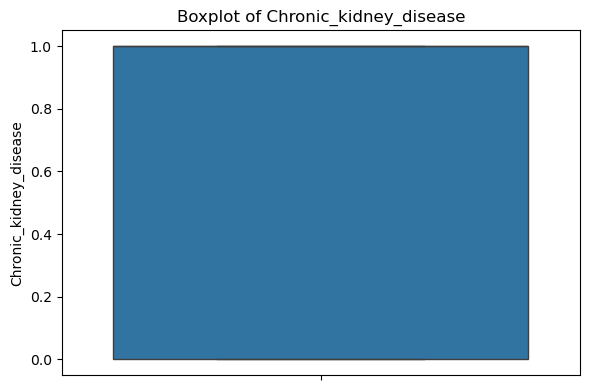

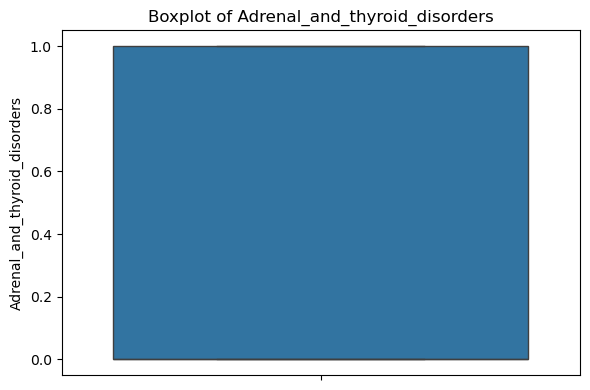

In [133]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
